<a href="https://colab.research.google.com/github/UmbertoB/neural-networks-research/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!rm -rf cloned_repo
!git clone https://github.com/UmbertoB/neural-networks-research.git cloned_repo

import cloned_repo.utils.model_factory as model_factory
import cloned_repo.utils.metrics_builder as metrics_builder
from cloned_repo.utils.plot_history import plot_history

Cloning into 'cloned_repo'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 101 (delta 41), reused 78 (delta 23), pack-reused 0
Receiving objects: 100% (101/101), 452.04 KiB | 4.48 MiB/s, done.
Resolving deltas: 100% (41/41), done.


# Simple NLP

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Activation, Dropout, \
    GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

batch_size = 15
alpha = 1e-3
epochs = 30
input_shape = (200, 200, 3)
layers = [Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')]

history, model, train_images, validation_images, test_images = model_factory.generate_model('drive/MyDrive/DATASET', input_shape, batch_size, alpha, epochs, layers)
# model = models.load_model('model_one.hdf5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 64)                7680064   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,680,129
Trainable params: 7,680,129
Non-trainable params: 0
_________________________________________________________________
Modelo Compilado...
drive/MyDrive/DATASET
Found 2100 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Iniciando treino do Modelo...
Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 3.4188 - acc: 0.6671
Epoch 1: val_acc improv

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

image_gen = ImageDataGenerator(rescale=1 / 255)
test_generator = image_gen.flow_from_directory('drive/MyDrive/DATASET/test', target_size=(200, 200),
                                        shuffle=False,
                                        class_mode='binary',
                                        batch_size=batch_size,
                                        save_to_dir=None)
print('\n')
metrics_builder.generate_confusion_matrix(model, test_generator, batch_size)

print('\n')
metrics_builder.generate_classification_report(model, test_generator, batch_size)

Found 300 images belonging to 2 classes.


Confusion Matrix
[[106  44]
 [  9 141]]


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
Classification Report
              precision    recall  f1-score   support

         Yes       0.92      0.71      0.80       150
          No       0.76      0.94      0.84       150

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.84      0.82      0.82       300



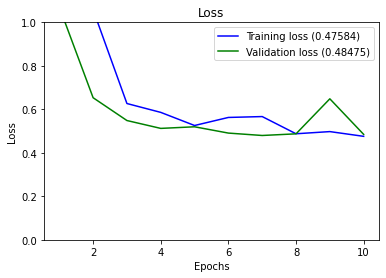

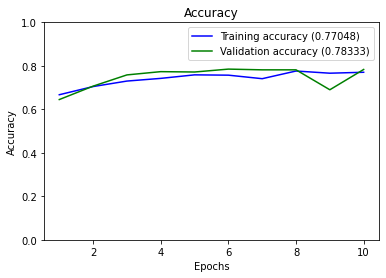

In [8]:
plot_history(history)

# CNN

In [12]:
batch_size = 15
alpha = 1e-3
epochs = 30
input_shape = (200, 200, 3)
layers = [
  Conv2D(32, (5,5), padding="same", activation = "relu", input_shape = input_shape),
  MaxPooling2D((2,2)),
  Conv2D(64, (5,5), padding="same", activation = "relu"),
  MaxPooling2D((2,2)),
  Flatten(),
  Dense(64, activation = 'relu'),
  Dropout(0.2),
  Dense(1, activation = 'sigmoid'),
]

history_cnn, model_cnn, train_images, validation_images, test_images = model_factory.generate_model('drive/MyDrive/DATASET', input_shape, batch_size, alpha, epochs, layers)
# model = models.load_model('model_one.hdf5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 160000)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [14]:
print('\n')
metrics_builder.generate_confusion_matrix(model_cnn, test_generator, batch_size)

print('\n')
metrics_builder.generate_classification_report(model_cnn, test_generator, batch_size)



Confusion Matrix
[[146   4]
 [  8 142]]


Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.
Classification Report
              precision    recall  f1-score   support

         Yes       0.95      0.97      0.96       150
          No       0.97      0.95      0.96       150

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



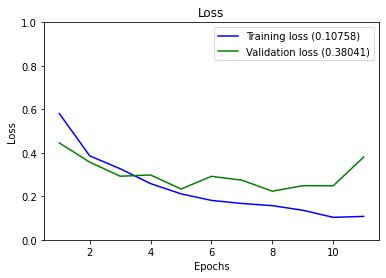

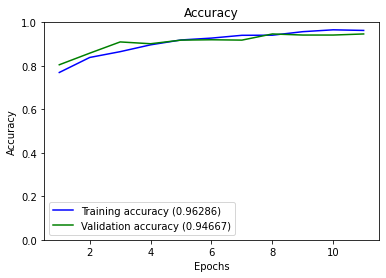

In [15]:
plot_history(history_cnn)